<a href="https://colab.research.google.com/github/GUILLENJV/SHM_AI/blob/master/6377366a6f84e2001a65fdfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#learned embedding encoding for a neural network
from numpy import unique
import numpy
from numpy import array
import pandas as pd
import datetime 
from time import sleep
from tqdm import tqdm
import os
from pandas import read_csv
import json
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#from predict import model 
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [ ]:
# carga los datos
#df = pd.read_excel('631d8277776f1d001a21e6eb.xlsx') 
df = pd.read_csv('6377366a6f84e2001a65fdfe.csv')

In [ ]:
df["landing_page_id"].value_counts()

637735d9b20e47001a2057c1    579
6377333cb20e47001a2057c0    579
637739596f84e2001a65fdff    579
63773a936f84e2001a65fe00    579
637739d9b20e47001a205808    579
62566aa432b19a0164d802be    579
Name: landing_page_id, dtype: int64

In [ ]:
df.head()

,_id,landing_pages_group_id,campaign_id,landing_page_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,...,visitor_geo_location_connection_type,visitor_geo_location_countryCode,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,visitor_tokens_add,converted_yes,converted_no
0,9fbf431f-e1c1-47c5-ac31-d319b0faf084,6377366a6f84e2001a65fdfe,626da13a732b314391fd5bea,637735d9b20e47001a2057c1,57dfdf25d6bed1662f3cfcaa,Chrome Mobile,G8 ThinQ,LM-G820V,LG,Android,...,Cable/DSL,US,Comcast Cable,Florida,hoswitsurp,Hq0LNjPqDq,solarstrip,NaN,0,1
1,b87e9ec4-254d-4af0-a4c2-6f86ede42faa,6377366a6f84e2001a65fdfe,626da13a732b314391fd5bea,637735d9b20e47001a2057c1,57dfdf25d6bed1662f3cfcaa,Chrome Mobile,Q3 Pro 5G,RMX2205,Realme,Android,...,Cable/DSL,US,AT&T U-verse,Louisiana,hoareswitctosol,XuwcsofXK1B,meter-sidebyside,NaN,0,1
2,6d3d8639-8fa6-49ea-9273-59a21a42e6dc,6377366a6f84e2001a65fdfe,627ef657a3ff612aae102cfc,6377333cb20e47001a2057c0,58939c5eeb1b39e23f2044bb,Chrome Mobile,Nokia X100,Nokia X100,HMD Global,Android,...,Cellular,US,T-Mobile USA,California,regwillcovzipnov,yV7hd2zvn,blondejudge,NaN,1,0
3,7198b1ef-31a2-4498-b684-d173017d53e4,6377366a6f84e2001a65fdfe,626da13a732b314391fd5bea,637739596f84e2001a65fdff,57dfdf25d6bed1662f3cfcaa,Chrome Mobile,Galaxy Note8,SM-N950N,Samsung,Android,...,Cellular,US,T-Mobile USA,New Jersey,socredsavehoebill,JligWddhq,tswallbatt,NaN,0,1
4,faffb31f-19ed-40d7-9ce8-54e8eb30983c,6377366a6f84e2001a65fdfe,6361a8d24cd8140019c68ad1,63773a936f84e2001a65fe00,58939c5eeb1b39e23f2044bb,Chrome Mobile,Galaxy View,SM-T677A,Samsung,Android,...,Cable/DSL,US,CenturyLink,Arizona,regwillcovzipnov,I3d1ypdj6S,manroofsolar,NaN,1,0


In [ ]:
df.dtypes

_id                                     object
landing_pages_group_id                  object
campaign_id                             object
landing_page_id                         object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_countryCode        object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
visitor_token

In [ ]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [ ]:
#!pip install sweetviz

In [ ]:
#import sweetviz as sv

In [ ]:
# Generar el reporte
#sweet_report = sv.analyze(df)

In [ ]:
# Se muestra la salida
#sweet_report.show_notebook()

In [ ]:
df.isna().sum().sort_values()

_id                                        0
visitor_tokens_cadid                       0
visitor_tokens_adh                         0
visitor_device_type                        0
converted_yes                              0
visitor_device_os_vendor                   0
visitor_device_os_family                   0
visitor_device_hardware_vendor             0
visitor_device_os_version                  0
visitor_device_hardware_family             0
visitor_device_browser                     0
traffic_source_id                          0
landing_page_id                            0
campaign_id                                0
landing_pages_group_id                     0
visitor_device_hardware_model              0
converted_no                               0
visitor_geo_location_countryCode           1
visitor_geo_location_regionName            1
visitor_tokens_adi                        10
visitor_geo_location_cityName            102
visitor_geo_location_isp                 124
visitor_ge

In [ ]:
df.shape

(3474, 24)

In [ ]:
df = df.drop(['landing_pages_group_id','visitor_tokens_add', '_id'], axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isna().sum().sort_values()

campaign_id                               0
visitor_tokens_cadid                      0
visitor_tokens_adh                        0
converted_yes                             0
visitor_device_os_version                 0
visitor_device_os_vendor                  0
visitor_device_os_family                  0
visitor_device_type                       0
visitor_device_hardware_model             0
visitor_device_hardware_family            0
visitor_device_browser                    0
traffic_source_id                         0
landing_page_id                           0
visitor_device_hardware_vendor            0
converted_no                              0
visitor_geo_location_countryCode          1
visitor_geo_location_regionName           1
visitor_tokens_adi                        5
visitor_geo_location_isp                 74
visitor_geo_location_connection_type     76
visitor_geo_location_cityName           101
dtype: int64

In [ ]:
df.shape

(3394, 21)

In [ ]:
# Imputamos la variable 
df['visitor_geo_location_countryCode'].fillna(df['visitor_geo_location_countryCode'].mode()[0], inplace=True)
df['visitor_geo_location_regionName'].fillna(df['visitor_geo_location_regionName'].mode()[0], inplace=True)
df['visitor_tokens_adi'].fillna(df['visitor_tokens_adi'].mode()[0], inplace=True)
df['visitor_geo_location_isp'].fillna(df['visitor_geo_location_isp'].mode()[0], inplace=True)
df['visitor_geo_location_connection_type'].fillna(df['visitor_geo_location_connection_type'].mode()[0], inplace=True)
df['visitor_geo_location_cityName'].fillna(df['visitor_geo_location_cityName'].mode()[0], inplace=True)

In [ ]:
df.shape

(3394, 21)

In [ ]:
df.isna().sum().sort_values()

campaign_id                             0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
visitor_geo_location_cityName           0
converted_yes                           0
visitor_device_type                     0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
landing_page_id                         0
visitor_device_os_version               0
converted_no                            0
dtype: int64

In [ ]:
df.columns

Index(['campaign_id', 'landing_page_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no'],
      dtype='object')

In [ ]:
X = df[['campaign_id', 'traffic_source_id',
       'visitor_device_browser', 'visitor_device_hardware_family',
       'visitor_device_hardware_model', 'visitor_device_hardware_vendor',
       'visitor_device_os_family', 'visitor_device_os_vendor',
       'visitor_device_os_version', 'visitor_device_type',
       'visitor_geo_location_cityName', 'visitor_geo_location_connection_type',
       'visitor_geo_location_countryCode', 'visitor_geo_location_isp',
       'visitor_geo_location_regionName', 'visitor_tokens_adh',
       'visitor_tokens_cadid', 'visitor_tokens_adi', 'converted_yes',
       'converted_no']]

In [ ]:
X = X.astype(str).to_numpy()

In [ ]:
y = df[["landing_page_id"]].to_numpy()

In [ ]:
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OrdinalEncoder()
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)


X shape: :  (3394, 20)


In [ ]:
encoded_x

array([[16.,  1.,  1., ..., 11.,  0.,  1.],
       [16.,  1.,  1., ...,  5.,  0.,  1.],
       [18.,  2.,  1., ...,  0.,  1.,  0.],
       ...,
       [ 9.,  0.,  1., ...,  3.,  1.,  0.],
       [ 1.,  2., 21., ..., 11.,  0.,  1.],
       [18.,  2.,  1., ...,  0.,  0.,  1.]])

In [ ]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(label_encoded_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
label_encoded_y

array([2, 2, 1, ..., 0, 0, 3])

In [ ]:
dummy_y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_x, dummy_y, test_size=0.30, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Definición del modelo
def modelo_mlp(): 
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], 
                kernel_initializer= 'he_uniform',
                activation='relu', activity_regularizer=regularizers.l1(1e-4)))
    model.add(BatchNormalization())
    model.add(Dense(15, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(10, kernel_initializer= 'he_uniform',
                activation='relu',activity_regularizer=regularizers.l1(1e-4)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())  
    model.add(Dense(6, kernel_initializer= 'he_uniform',
                activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model = modelo_mlp()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                525       
                                                                 
 batch_normalization (BatchN  (None, 25)               100       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                1

In [ ]:
# Entrenamos el modelo con el dataset
history=model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/40
75/75 [==============================] - 4s 19ms/step - loss: 2.4806 - accuracy: 0.1604 - val_loss: 1.9967 - val_accuracy: 0.1609
Epoch 2/40
75/75 [==============================] - 1s 9ms/step - loss: 2.1503 - accuracy: 0.1869 - val_loss: 1.8906 - val_accuracy: 0.1914
Epoch 3/40
75/75 [==============================] - 1s 8ms/step - loss: 2.0169 - accuracy: 0.2051 - val_loss: 1.8213 - val_accuracy: 0.2355
Epoch 4/40
75/75 [==============================] - 1s 8ms/step - loss: 1.9304 - accuracy: 0.2240 - val_loss: 1.7665 - val_accuracy: 0.2512
Epoch 5/40
75/75 [==============================] - 1s 9ms/step - loss: 1.8095 - accuracy: 0.2531 - val_loss: 1.7208 - val_accuracy: 0.2581
Epoch 6/40
75/75 [==============================] - 1s 9ms/step - loss: 1.7694 - accuracy: 0.2636 - val_loss: 1.6787 - val_accuracy: 0.2728
Epoch 7/40
75/75 [==============================] - 1s 8ms/step - loss: 1.7255 - accuracy: 0.2720 - val_loss: 1.6455 - val_accuracy: 0.2856
Epoch 8/40
75/75 [=

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Precisión Entrenamiento: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Precisión Prueba:  {:.4f}".format(accuracy))

Precisión Entrenamiento: 0.3642
Precisión Prueba:  0.3454


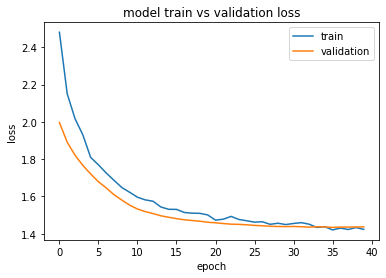

In [ ]:
from matplotlib import pyplot
from numpy import array
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
#Making confusion matrix that checks accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

32/32 [==============================] - 0s 2ms/step


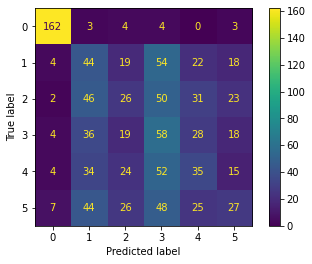

In [ ]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       176
           1       0.21      0.27      0.24       161
           2       0.22      0.15      0.18       178
           3       0.22      0.36      0.27       163
           4       0.25      0.21      0.23       164
           5       0.26      0.15      0.19       177

    accuracy                           0.35      1019
   macro avg       0.34      0.34      0.33      1019
weighted avg       0.34      0.35      0.34      1019



In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test[1:2]))
predictions

1/1 [==============================] - 0s 18ms/step


array([[0.00749402, 0.20634525, 0.15884976, 0.1883441 , 0.22511338,
        0.21385346]], dtype=float32)

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test[1:2])).argmax(1)
predictions

1/1 [==============================] - 0s 19ms/step


array([4])

In [ ]:
print(label_encoder.inverse_transform(predictions))

['637739d9b20e47001a205808']


In [ ]:
from keras.models import load_model 
model.save("model_6377366a6f84e2001a65fdfe.h5") 
loaded_model = load_model("model_6377366a6f84e2001a65fdfe.h5")

In [ ]:
# make class predictions with the model
predictions = (model.predict(X_test[1:2]))
predictions

1/1 [==============================] - 0s 19ms/step


array([[0.00749402, 0.20634525, 0.15884976, 0.1883441 , 0.22511338,
        0.21385346]], dtype=float32)

In [ ]:
# make class predictions with the model
predictions = (loaded_model.predict(X_test[1:2])).argmax(1)
predictions

1/1 [==============================] - 0s 136ms/step


array([4])

In [ ]:
print(label_encoder.inverse_transform(predictions))

['637739d9b20e47001a205808']
